**LOAD THE DATASET**

In [59]:
import pandas as pd
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [60]:
df.shape

(200, 4)

In [61]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**VISUALISE THE DATA** 

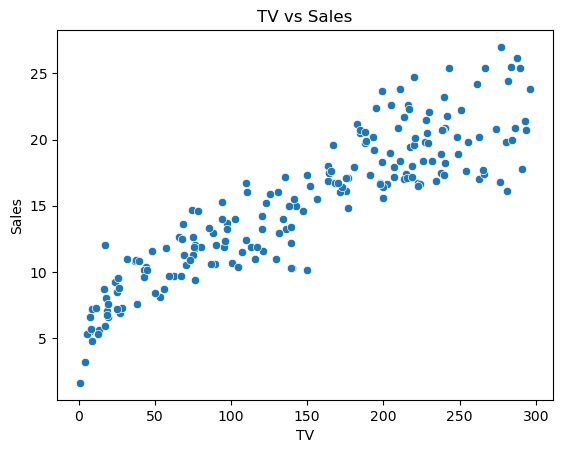

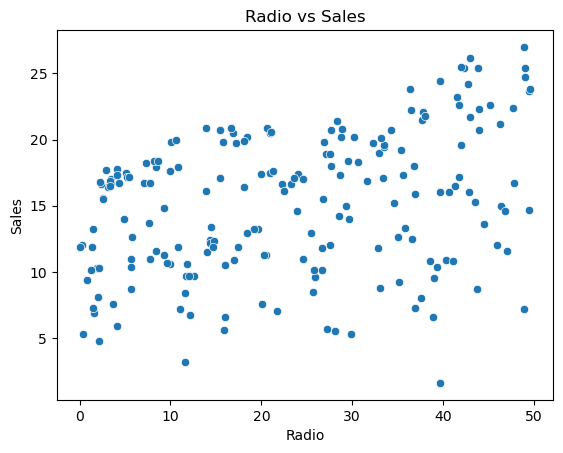

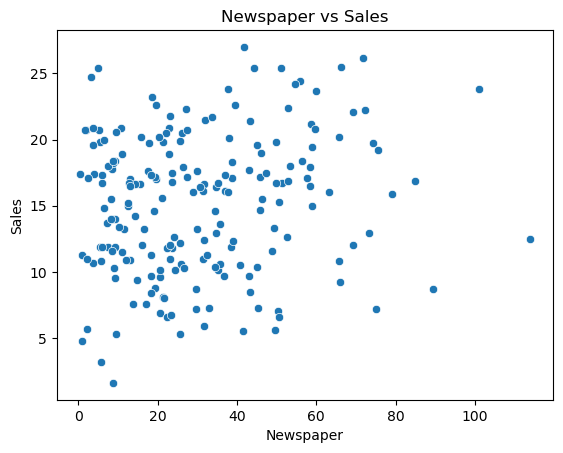

In [62]:
x_vars = ['TV', 'Radio', 'Newspaper']
y_var = 'Sales'

for x in x_vars:
    sns.scatterplot(x=x, y=y_var, data=df)
    plt.title(f'{x} vs {y_var}')
    plt.xlabel(x)
    plt.ylabel(y_var)
    plt.show()

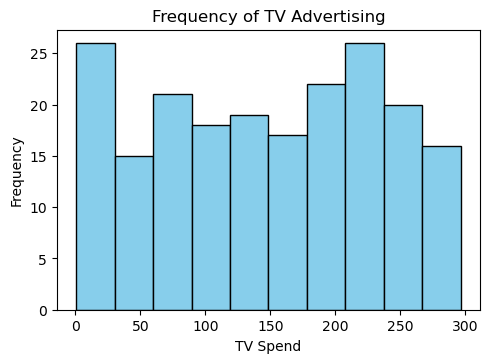

In [63]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2,1)
plt.hist(df['TV'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency of TV Advertising')
plt.xlabel('TV Spend')
plt.ylabel('Frequency');

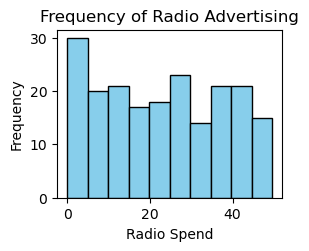

In [64]:
plt.subplot(2, 2, 2)
plt.hist(df['Radio'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency of Radio Advertising')
plt.xlabel('Radio Spend')
plt.ylabel('Frequency');

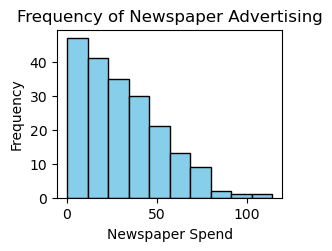

In [65]:
plt.subplot(2, 2, 3)
plt.hist(df['Newspaper'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency of Newspaper Advertising')
plt.xlabel('Newspaper Spend')
plt.ylabel('Frequency');

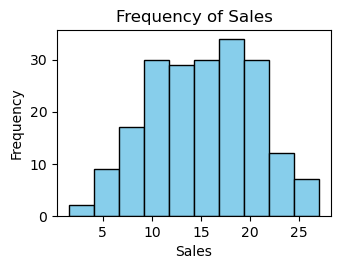

In [66]:
plt.subplot(2, 2, 4)
plt.hist(df['Sales'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [67]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [68]:
X = df[['TV', 'Radio', 'Newspaper']] 
y = df['Sales']                     

**SPLIT THE DATA**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())

X_train:
        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6

X_test:
        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2

y_train:
79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

y_test:
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


**TRAIN THE MODEL**

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**PREDICT THE MODEL**

In [71]:
y_pred = model.predict(X_test)
print(y_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


**PLOT ACTUAL AND PREDICTED**

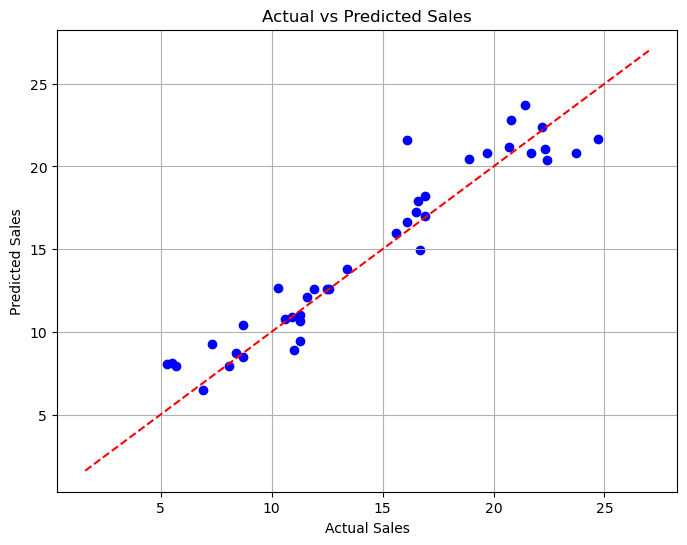

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()